In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Transformed_dataset.csv')

In [3]:
df.head(10)

,Date_Timestamp,DayOfWeek,Month,HourOfDay,Consumption_B1,Consumption_B2,Consumption_B3,Generation_1,Generation_2,Generation_3,Gb(i),Gd(i),Gr(i),Temperature (c),relative_humidity_2m (%),dew_point_2m (¬∞C),precipitation (mm),cloud_cover (%),wind_speed_10m (km/h),Total_Consumption
0,1/1/2019 0:30,1,1,0,263.934730,119.965555,100.382488,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.24,87,-1.7,0.0,56,7.2,484.282773
1,1/1/2019 1:30,1,1,1,261.381617,126.873583,98.777157,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.33,87,-1.6,0.0,100,7.6,487.032358
2,1/1/2019 2:30,1,1,2,289.598378,130.980467,109.956200,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.36,88,-1.5,0.0,94,5.9,530.535045
3,1/1/2019 3:30,1,1,3,340.806009,143.535150,129.512557,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.21,88,-1.6,0.0,88,5.5,613.853717
4,1/1/2019 4:30,1,1,4,399.536718,174.588548,150.485312,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.03,88,-1.7,0.0,81,6.4,724.610577
5,1/1/2019 5:30,1,1,5,359.570304,251.327078,135.929211,0.000000,0.000000,0.000000,0.0,0.00,0.00,-0.49,91,-1.9,0.0,67,5.1,746.826593
6,1/1/2019 6:30,1,1,6,352.059444,247.050640,147.602814,0.000000,0.000000,0.000000,0.0,15.29,0.58,-0.56,90,-2.1,0.0,75,4.8,746.712898
7,1/1/2019 7:30,1,1,7,344.880960,239.038966,147.823253,0.000000,0.650407,0.000000,0.0,38.27,1.44,0.05,90,-1.5,0.0,86,3.2,731.743179
8,1/1/2019 8:30,1,1,8,329.569168,237.915319,135.971290,14.358974,254.634146,17.341256,0.0,75.57,2.84,-0.19,92,-1.4,0.0,89,4.3,703.455776
9,1/1/2019 9:30,1,1,9,314.838795,230.916968,129.750366,70.618401,644.552846,85.285463,0.0,93.85,3.53,0.43,88,-1.3,0.0,80,4.2,675.506128


## Comsumption Prediction
## Building 1

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
# Define the MAPE function
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
X_b1 = df.drop(['Date_Timestamp','Consumption_B1','Generation_1','Generation_2','Generation_3','Gb(i)','Gd(i)','Gr(i)','Total_Consumption'], axis=1)
y_b1 = df['Consumption_B1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b1, y_b1, test_size=0.042, random_state=42, shuffle=False)

In [13]:
import xgboost as xgb

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1]
}

# Initialize the XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Fit the XGBoost model with the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params_xgb = grid_search_xgb.best_params_
print("Best XGBoost Hyperparameters:", best_params_xgb)

# Use the best XGBoost model for prediction
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")

mape_xgb = calculate_mape(y_test, y_pred_xgb)
print(f"XGBoost MAPE: {mape_xgb:.2f}%")

Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost RMSE: 34.4373128387139
XGBoost MAE: 32.069704728261925
XGBoost MAPE: 12.42%


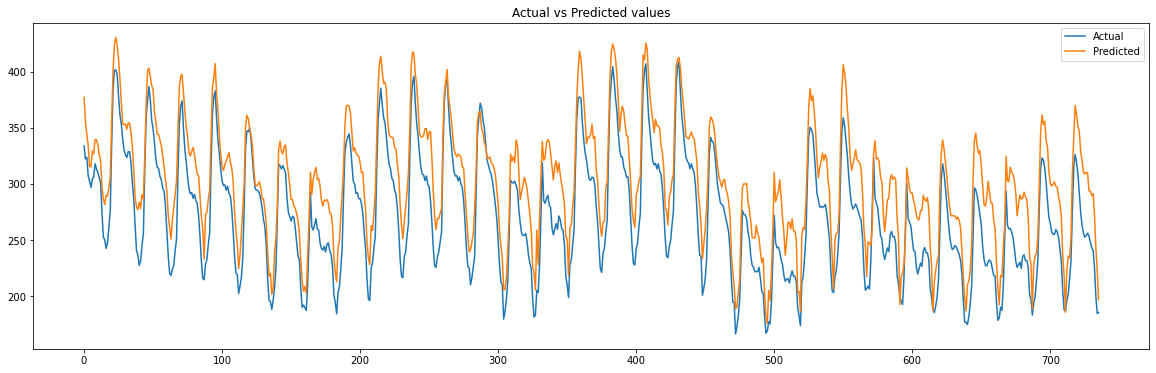

In [14]:
#Plotting the actual vs predicted values for the test set
plt.figure(figsize=(20, 6))
y_test1 = y_test.to_numpy()
plt.plot(y_test1, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted values")
plt.show()

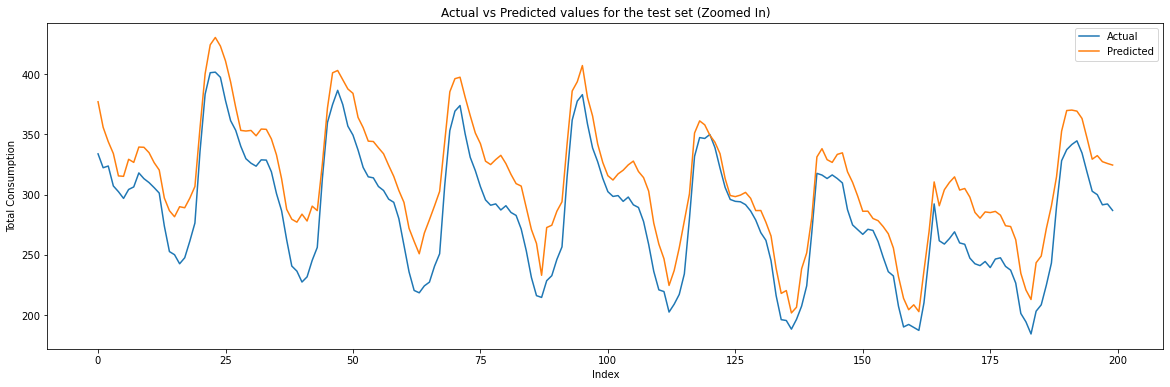

In [15]:
y_test1 = y_test.to_numpy()

# Define the start and end indices for the range you want to visualize
start_index = 0
end_index = 200
plt.figure(figsize=(20, 6))
plt.plot(y_test1[start_index:end_index], label='Actual')
plt.plot(y_pred_xgb[start_index:end_index], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted values for the test set (Zoomed In)")
plt.xlabel("Index")
plt.ylabel("Total Consumption")
plt.show()

## Building 2

In [16]:
X_b2 = df.drop(['Date_Timestamp','Consumption_B2','Generation_1','Generation_2','Generation_3','Gb(i)','Gd(i)','Gr(i)','Total_Consumption'], axis=1)
y_b2 = df['Consumption_B2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b2, y_b2, test_size=0.042, random_state=42, shuffle=False)

In [17]:
import xgboost as xgb

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1]
}

# Initialize the XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Fit the XGBoost model with the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params_xgb = grid_search_xgb.best_params_
print("Best XGBoost Hyperparameters:", best_params_xgb)

# Use the best XGBoost model for prediction
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")

mape_xgb = calculate_mape(y_test, y_pred_xgb)
print(f"XGBoost MAPE: {mape_xgb:.2f}%")

Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost RMSE: 14.96654913899463
XGBoost MAE: 12.466582943180622
XGBoost MAPE: 7.26%


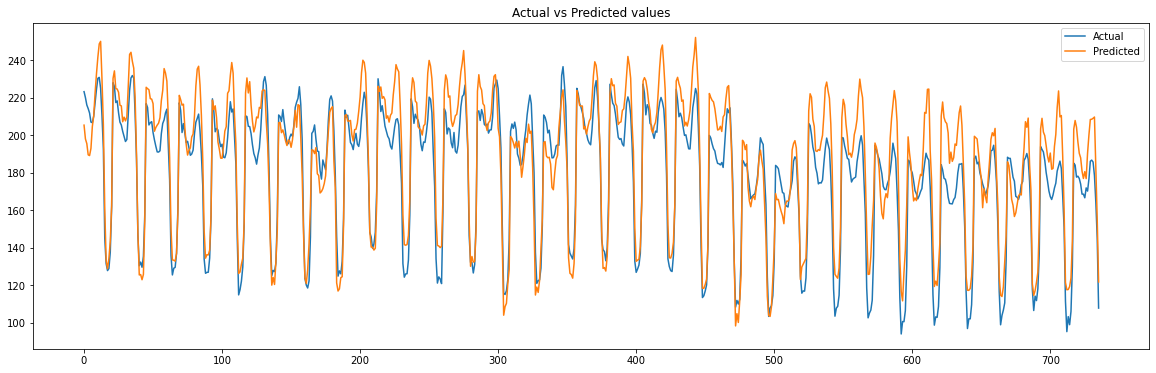

In [18]:
#Plotting the actual vs predicted values for the test set
plt.figure(figsize=(20, 6))
y_test1 = y_test.to_numpy()
plt.plot(y_test1, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted values")
plt.show()

## Building 3

In [19]:
X_b3 = df.drop(['Date_Timestamp','Consumption_B3','Generation_1','Generation_2','Generation_3','Gb(i)','Gd(i)','Gr(i)','Total_Consumption'], axis=1)
y_b3 = df['Consumption_B3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b3, y_b3, test_size=0.042, random_state=42, shuffle=False)

In [20]:
# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1]
}

# Initialize the XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Fit the XGBoost model with the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params_xgb = grid_search_xgb.best_params_
print("Best XGBoost Hyperparameters:", best_params_xgb)

# Use the best XGBoost model for prediction
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")

mape_xgb = calculate_mape(y_test, y_pred_xgb)
print(f"XGBoost MAPE: {mape_xgb:.2f}%")

Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
XGBoost RMSE: 10.120638789672523
XGBoost MAE: 8.574283414907146
XGBoost MAPE: 7.89%


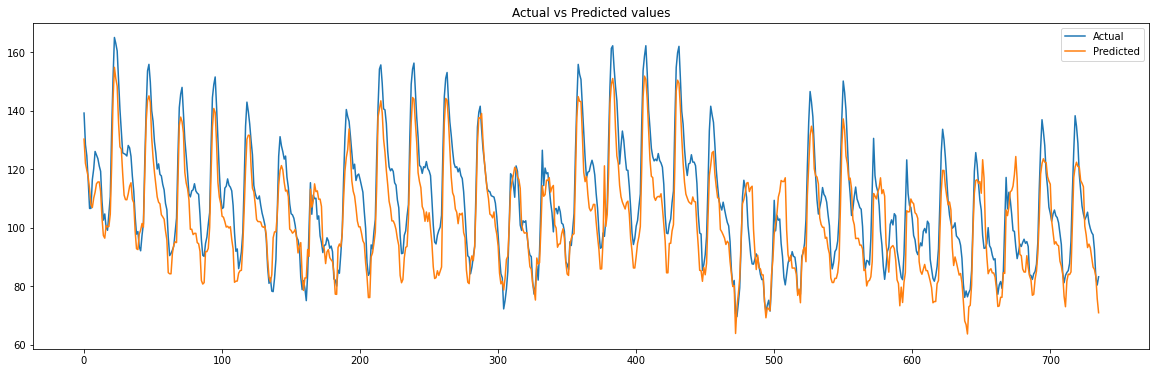

In [21]:
#Plotting the actual vs predicted values for the test set
plt.figure(figsize=(20, 6))
y_test1 = y_test.to_numpy()
plt.plot(y_test1, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted values")
plt.show()

## Aggregate Model

In [28]:
X_agg = df.drop(['Date_Timestamp','Consumption_B2','Consumption_B3','Generation_1','Generation_2','Generation_3','Gb(i)','Gd(i)','Gr(i)','Total_Consumption'], axis=1)
y_agg = df['Total_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_agg, y_agg, test_size=0.042, random_state=42, shuffle=False)

In [29]:
# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1]
}

# Initialize the XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Fit the XGBoost model with the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params_xgb = grid_search_xgb.best_params_
print("Best XGBoost Hyperparameters:", best_params_xgb)

# Use the best XGBoost model for prediction
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")

mape_xgb = calculate_mape(y_test, y_pred_xgb)
print(f"XGBoost MAPE: {mape_xgb:.2f}%")

Best XGBoost Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
XGBoost RMSE: 14.721014077646124
XGBoost MAE: 12.00193651375998
XGBoost MAPE: 2.18%


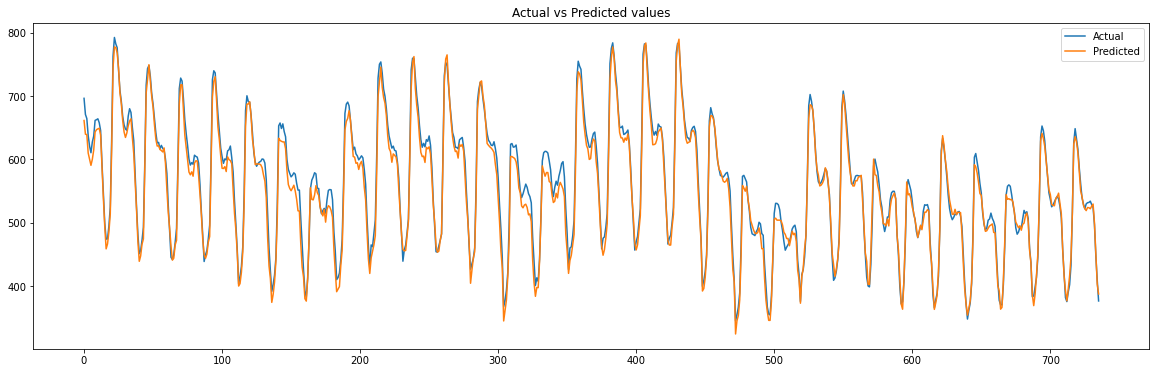

In [30]:
#Plotting the actual vs predicted values for the test set
plt.figure(figsize=(20, 6))
y_test1 = y_test.to_numpy()
plt.plot(y_test1, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted values")
plt.show()